In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [8]:
UDS10Hoo = candels[-3]

delz = UDS10Hoo[0]
nearby = UDS10Hoo[1][1]
host = UDS10Hoo[1][2]
lc = UDS10Hoo[1][3]

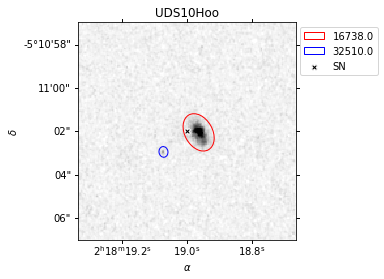

In [18]:
nick = UDS10Hoo[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(UDS10Hoo[1][0]['RA'],UDS10Hoo[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.015,val_max = .12 )

In [16]:
from astropy.table import hstack
hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.mass[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]])

Seq,zbest,zspec,zphot,zphot_l95,zphot_u95
float64,float64,float64,float64,float64,float64
16738.0,1.528,-99.0,1.528,1.43,1.66
32510.0,0.68,-99.0,0.68,0.48,0.83


## Published as CC at specz = 1.818 based on bounds of host photoz = 1.678 = [1.53,1.82]
## SN spectral feature was assumed to be [OIII]5007 z = 1.818 since that lies w/in host

## That NIR SED looks different than a typical spectrum.... much fewer points -> lower resolution? Are each of those data points the center of the bandpass from the different filter data?   Is there a better (xshooter?) spectrum somewhere that gives all those possible features at various redshifts.

## Decliner? didn't notice it as brighter but rather saw it on decline from later image - earlier template? Difference assumes no flux in template so sub provides lower limit on flux for discovery image. why is that significant don't we have a flux for any/all photometry with errors?

## The host is clear, my redshift disagrees photz = 1.528 = [1.43,1.66]. This doesn't agree with any of the redshifts for the spectral features identified.

## Teddy from 12.12 says that his analysis of an (xshooter?) spectrum for this object led him to rule it as likely AGN.